In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
cleaned_data = pd.read_csv("Cleaned Data.csv",index_col = "Unnamed: 0")
cleaned_data

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
3887,22384.00,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3888,19497.00,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3889,42707.00,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3890,42203.00,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend


In [3]:
data = cleaned_data.copy()

In [4]:
data

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
3887,22384.00,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3888,19497.00,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3889,42707.00,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3890,42203.00,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend


## Data Exploration

In [5]:
data.head()

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday


In [6]:
data.shape

(3892, 12)

In [7]:
data.columns

Index(['price', 'airline_name', 'departure_city', 'arrival_city',
       'travel_date', 'duration', 'stops', 'cabin_class', 'booking_date',
       'days_until_travel', 'booking_type', 'travel_type'],
      dtype='object')

In [8]:
data["booking_date"] = pd.to_datetime(data["booking_date"])

In [9]:
data["travel_date"] = pd.to_datetime(data["travel_date"])

In [10]:
data.dtypes

price                       float64
airline_name                 object
departure_city               object
arrival_city                 object
travel_date          datetime64[ns]
duration                      int64
stops                        object
cabin_class                  object
booking_date         datetime64[ns]
days_until_travel             int64
booking_type                 object
travel_type                  object
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3892 entries, 0 to 3891
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              3892 non-null   float64       
 1   airline_name       3892 non-null   object        
 2   departure_city     3892 non-null   object        
 3   arrival_city       3892 non-null   object        
 4   travel_date        3892 non-null   datetime64[ns]
 5   duration           3892 non-null   int64         
 6   stops              3892 non-null   object        
 7   cabin_class        3892 non-null   object        
 8   booking_date       3892 non-null   datetime64[ns]
 9   days_until_travel  3892 non-null   int64         
 10  booking_type       3892 non-null   object        
 11  travel_type        3892 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 395.3+ KB


#### Categorical columns

In [12]:
cat_cols = data.select_dtypes(include = "object").columns
cat_cols

Index(['airline_name', 'departure_city', 'arrival_city', 'stops',
       'cabin_class', 'booking_type', 'travel_type'],
      dtype='object')

#### Numerical columns

In [13]:
num_cols = data.select_dtypes(include = "number").columns
num_cols

Index(['price', 'duration', 'days_until_travel'], dtype='object')

#### Unique Values in Each Columns 

In [14]:
for i in data[cat_cols]:
    print(f"No of Unique Values in {i} column is: ", data[i].unique())
    print()

No of Unique Values in airline_name column is:  ['Air India' 'IndiGo' 'Akasa Air' 'SpiceJet' 'Etihad Airways']

No of Unique Values in departure_city column is:  ['Delhi' 'Banglore' 'Chennai' 'Mumbai' 'Kolkata']

No of Unique Values in arrival_city column is:  ['Mumbai' 'Kolkata' 'Hyderabad' 'Goa' 'Banglore' 'Guwahathi']

No of Unique Values in stops column is:  ['Direct' '1 stop' '3 stops' '2 stops']

No of Unique Values in cabin_class column is:  ['Business' 'Economy' 'First' 'Premium Economy']

No of Unique Values in booking_type column is:  ['Moderate' 'Advanced' 'Last-minute']

No of Unique Values in travel_type column is:  ['Holiday' 'Weekday' 'Weekend']



In [15]:
for i in data[cat_cols]:
    print(f"No of Unique Values in {i} column is:", data[i].nunique())
    print()

No of Unique Values in airline_name column is: 5

No of Unique Values in departure_city column is: 5

No of Unique Values in arrival_city column is: 6

No of Unique Values in stops column is: 4

No of Unique Values in cabin_class column is: 4

No of Unique Values in booking_type column is: 3

No of Unique Values in travel_type column is: 3



#### Summary Statistics 

In [16]:
data[num_cols].describe()

,price,duration,days_until_travel
count,3892.000000,3892.000000,3892.000000
mean,30434.573099,425.412384,24.342497
std,29713.645818,362.888379,18.421048
min,2682.000000,70.000000,2.000000
25%,10554.100000,155.000000,9.000000
50%,19105.110000,345.000000,19.000000
75%,40541.565000,525.000000,41.000000
max,291560.990000,1750.000000,55.000000


In [17]:
data[cat_cols].describe()

,airline_name,departure_city,arrival_city,stops,cabin_class,booking_type,travel_type
count,3892,3892,3892,3892,3892,3892,3892
unique,5,5,6,4,4,3,3
top,Air India,Delhi,Hyderabad,1 stop,Premium Economy,Moderate,Weekend
freq,3148,1167,740,2168,1358,1727,1345


#### Value Counts

In [18]:
for i in data[cat_cols].columns:
    print(f"Count of Each Value in {i} column is:", data[i].value_counts())
    print()

Count of Each Value in airline_name column is: Air India         3148
IndiGo             637
Akasa Air           55
SpiceJet            30
Etihad Airways      22
Name: airline_name, dtype: int64

Count of Each Value in departure_city column is: Delhi       1167
Chennai      740
Mumbai       733
Banglore     699
Kolkata      553
Name: departure_city, dtype: int64

Count of Each Value in arrival_city column is: Hyderabad    740
Goa          733
Kolkata      699
Banglore     636
Guwahathi    553
Mumbai       531
Name: arrival_city, dtype: int64

Count of Each Value in stops column is: 1 stop     2168
Direct     1701
2 stops      22
3 stops       1
Name: stops, dtype: int64

Count of Each Value in cabin_class column is: Premium Economy    1358
Economy            1273
Business           1225
First                36
Name: cabin_class, dtype: int64

Count of Each Value in booking_type column is: Moderate       1727
Advanced       1266
Last-minute     899
Name: booking_type, dtype: int64

Coun

## Univariate Analysis

#### Price Analysis

In [19]:
data["price"].describe()

count      3892.000000
mean      30434.573099
std       29713.645818
min        2682.000000
25%       10554.100000
50%       19105.110000
75%       40541.565000
max      291560.990000
Name: price, dtype: float64

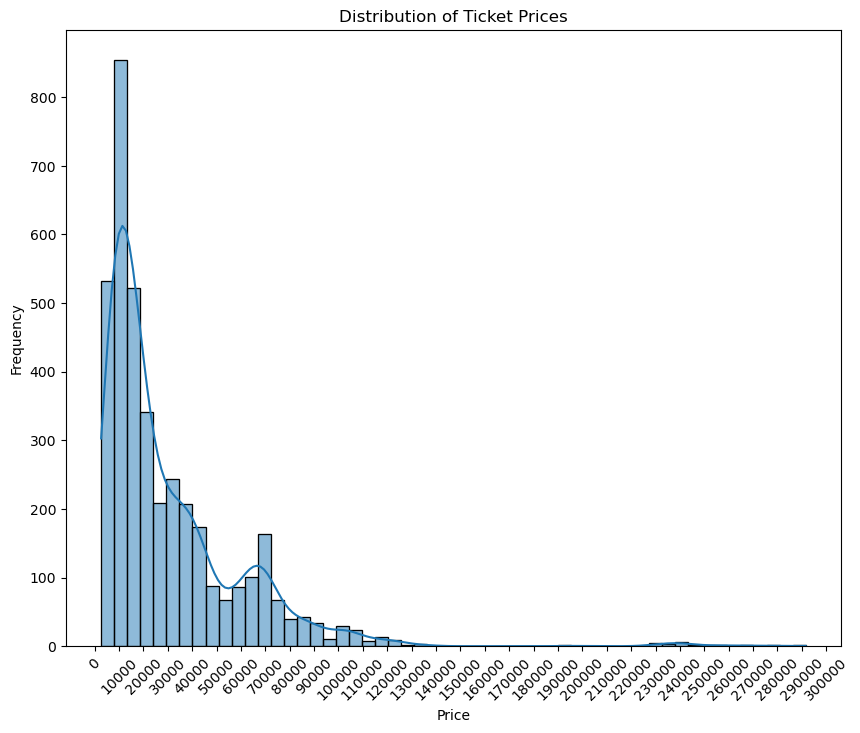

In [52]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data,
             x="price",
             bins=54,
             kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Set x-axis ticks with a step of 10,000
plt.xticks(ticks=range(0, 301000, 10000),rotation=45)  # Adjust range as needed
plt.show()

In [53]:
# Create bins for the price ranges
bins = range(0, 300001, 10000)  # Bins of 10,000 from 0 to 300,000
labels = [f"{i}-{i+10000}" for i in bins[:-1]]  # Label for each range

# Create a new column with price ranges
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)

# Count the frequency of tickets in each price range
price_distribution = data['price_range'].value_counts().sort_index()

# Print the distribution
print(price_distribution)


0-10000           866
10000-20000      1170
20000-30000       438
30000-40000       420
40000-50000       274
50000-60000       124
60000-70000       252
70000-80000       126
80000-90000        78
90000-100000       35
100000-110000      51
110000-120000      22
120000-130000      11
130000-140000       3
140000-150000       0
150000-160000       0
160000-170000       0
170000-180000       0
180000-190000       0
190000-200000       1
200000-210000       0
210000-220000       0
220000-230000       0
230000-240000      11
240000-250000       5
250000-260000       2
260000-270000       1
270000-280000       1
280000-290000       0
290000-300000       1
Name: price_range, dtype: int64


#### Detecting Outliers

In [21]:
Q1 = np.quantile(data["price"],0.25)
Q2 =  np.quantile(data["price"],0.50)
Q3 = np.quantile(data["price"],0.75)

iqr = Q3 - Q1
print(f"iqr : {iqr}")

lower_whisker = Q1 - 1.5* iqr
upper_whisker = Q3 + 1.5* iqr

outliers = data[(data["price"] < lower_whisker) | (data["price"] > upper_whisker)]
len(outliers)

iqr : 29987.465000000004


180

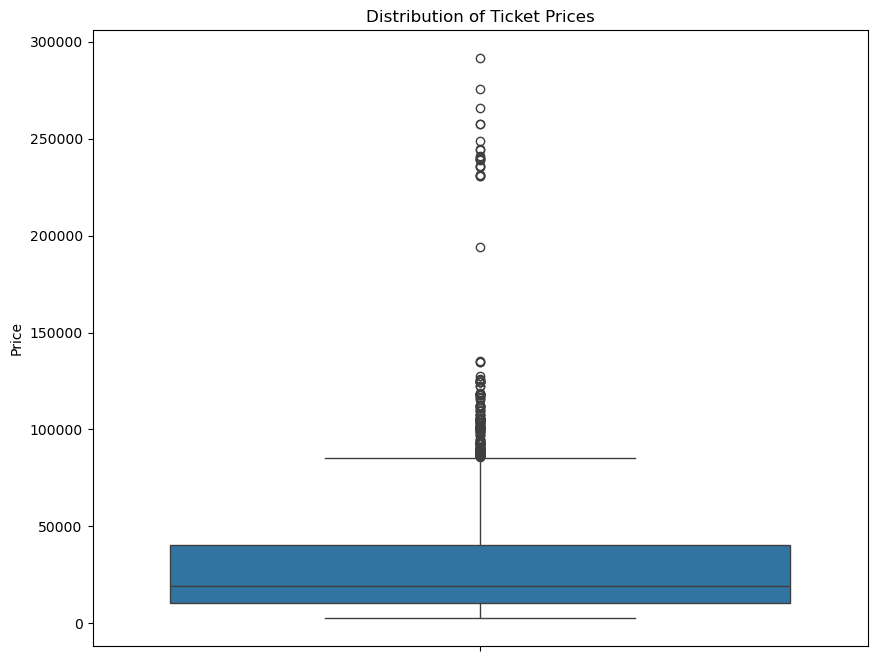

In [22]:
 plt.figure(figsize = (10,8))
sns.boxplot(data = data,
               y = "price")
plt.title('Distribution of Ticket Prices')
plt.ylabel('Price')
plt.show()

+ Outliers exist but represent valid pricing, not errors accurately reflect real market conditions and also reprents a small portion (180 out of 3892 tickets, ~4.6%).
+ Most ticket prices are concentrated in the range of 10,000 to 40,000.
+ The dataset is positively skewed due to the presence of high-priced outliers.

#### No of Stops Analysis

In [23]:
stop_counts = data["stops"].value_counts()
stop_counts

1 stop     2168
Direct     1701
2 stops      22
3 stops       1
Name: stops, dtype: int64

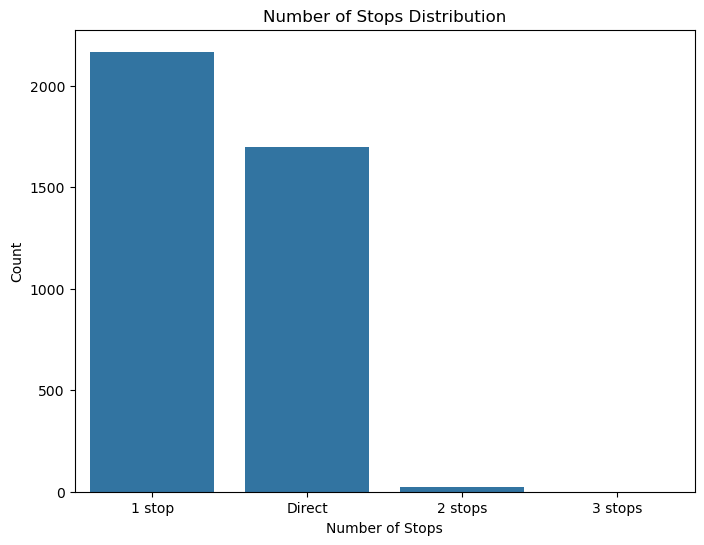

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x=stop_counts.index, y=stop_counts.values)
plt.title('Number of Stops Distribution')
plt.xlabel('Number of Stops')
plt.ylabel('Count')
plt.show()

#### Cabin Class Analysis

In [30]:
cabin_counts = data["cabin_class"].value_counts()
cabin_counts

Premium Economy    1358
Economy            1273
Business           1225
First                36
Name: cabin_class, dtype: int64

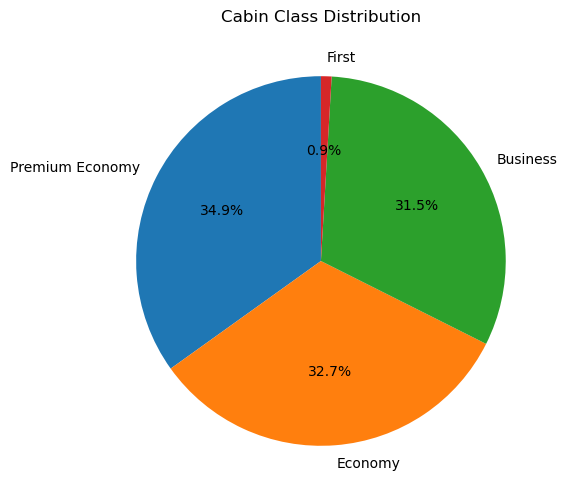

In [32]:
plt.figure(figsize=(8,6))
plt.pie(cabin_counts.values, labels=cabin_counts.index, autopct='%1.1f%%',
        startangle=90)
plt.title('Cabin Class Distribution')
plt.show()

## Bivariate Analysis

#### Price vs Booking Type

In [27]:
booking_type_stats = data.groupby('booking_type')['price'].describe()
booking_type_stats

,count,mean,std,min,25%,50%,75%,max
booking_type,,,,,,,,
Advanced,1266.0,24831.534297,21573.409999,2682.00,8178.5475,16206.00,38111.0,104723.00
Last-minute,899.0,39073.099956,36159.496798,5810.54,14752.2750,25450.00,51070.5,291560.99
Moderate,1727.0,30045.118251,30115.492508,3998.83,10483.3300,19498.71,39526.0,275896.07


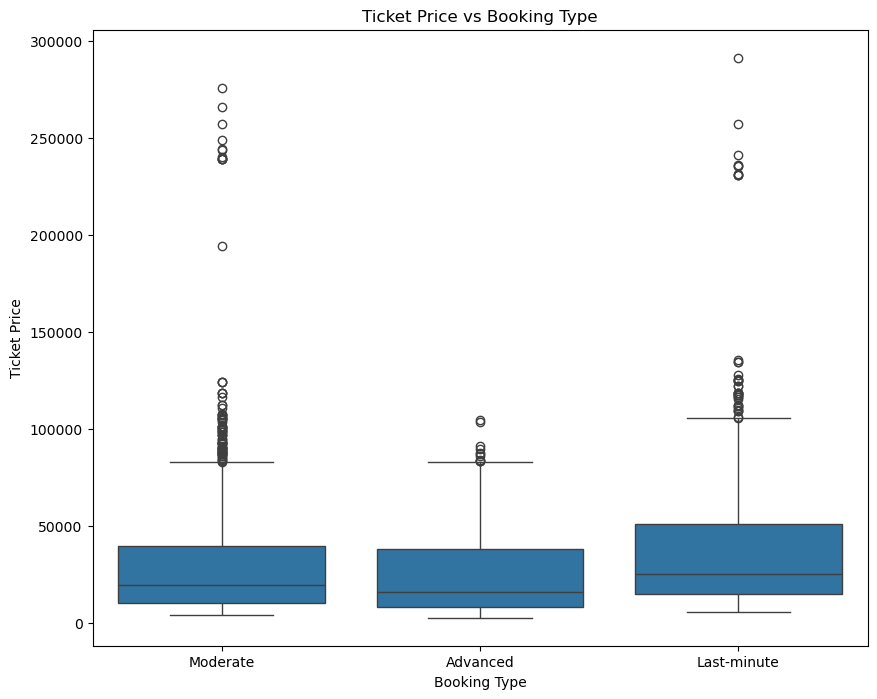

In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='booking_type', y='price')
plt.title('Ticket Price vs Booking Type')
plt.xlabel('Booking Type')
plt.ylabel('Ticket Price')
plt.show()

#### price vs travel type

In [29]:
travel_type_stats = data.groupby('travel_type')['price'].describe()
travel_type_stats

,count,mean,std,min,25%,50%,75%,max
travel_type,,,,,,,,
Holiday,1233.0,29580.987299,26869.082644,3592.77,11118.22,19533.000,39575.86,257611.94
Weekday,1314.0,31091.277314,30008.631022,3161.00,9962.88,18639.405,41980.75,275896.07
Weekend,1345.0,30575.511353,31834.481095,2682.00,10492.24,19343.220,40004.00,291560.99


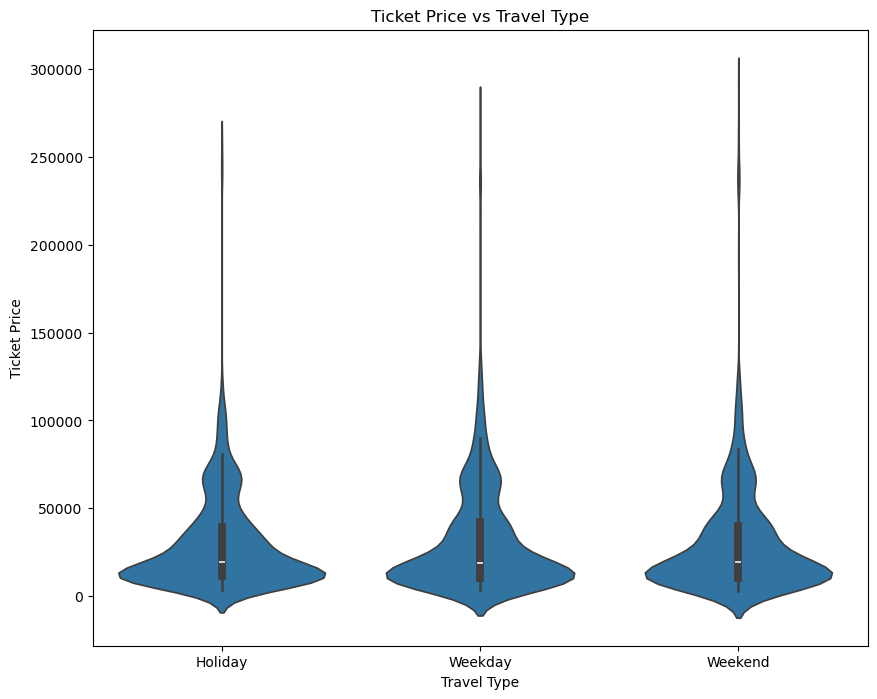

In [30]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x='travel_type', y='price')
plt.title('Ticket Price vs Travel Type')
plt.xlabel('Travel Type')
plt.ylabel('Ticket Price')
plt.show()

#### Ticket price vs Airline

In [31]:
average_price_by_airline = data.groupby('airline_name')['price'].mean().sort_values()
average_price_df = average_price_by_airline.reset_index()

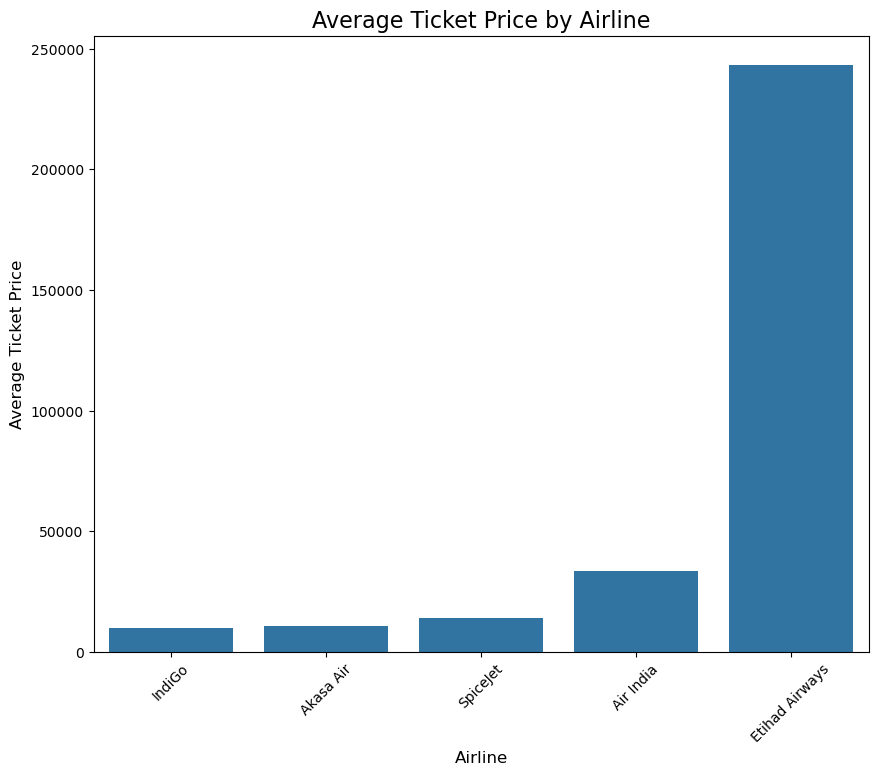

In [32]:
plt.figure(figsize=(10, 8))
sns.barplot(data=average_price_df, x='airline_name', y='price')
plt.title('Average Ticket Price by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Ticket Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10)
plt.show()

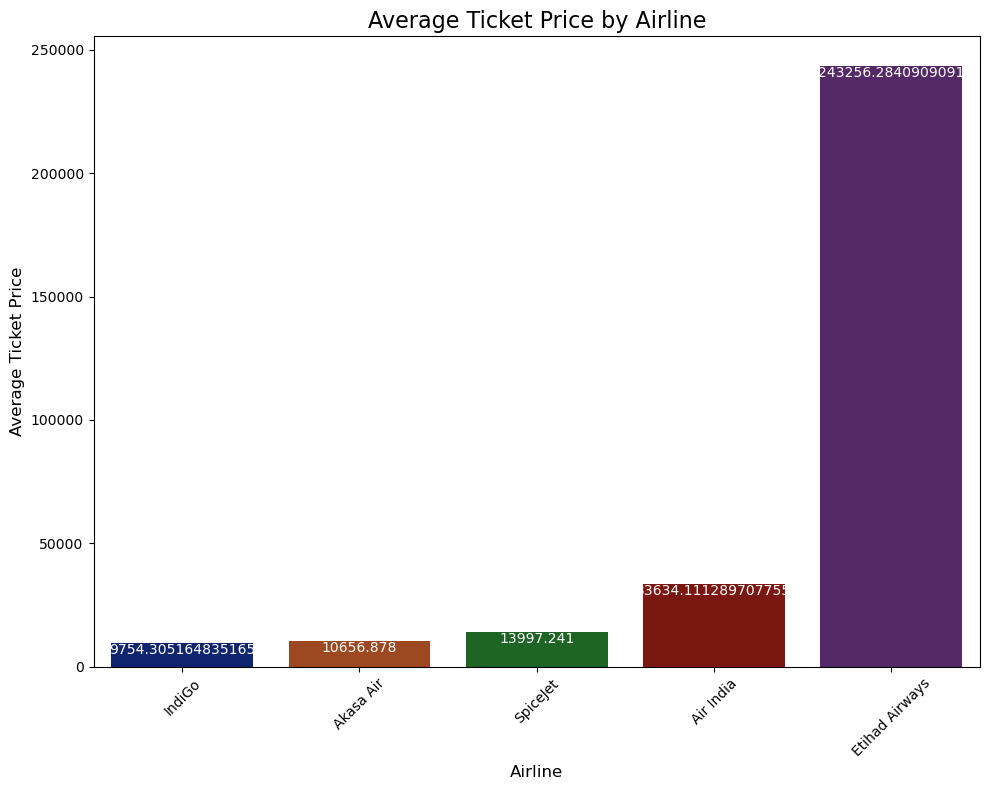

In [44]:
# Generate unique colors for each bar
colors = sns.color_palette('dark', len(average_price_df))

# Plot the barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=average_price_df, x='airline_name', y='price', palette=colors)

# Add a title and axis labels
plt.title('Average Ticket Price by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Ticket Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add numbers inside each bar
for index, row in average_price_df.iterrows():
    plt.text(index, row['price'] - 10,  # Adjust y-position slightly inside the bar
             str(row['price']), ha='center', va='top', color='white', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


#### Price vs days_to_travel

In [34]:
pivot_table = pd.pivot_table(data, values='price', index='days_until_travel')
pivot_table

,price
days_until_travel,
2,43228.431319
3,38467.152075
5,38449.556759
6,36050.402542
9,31706.890529
16,30463.065403
19,32612.163555
20,28375.815021
22,26897.462174


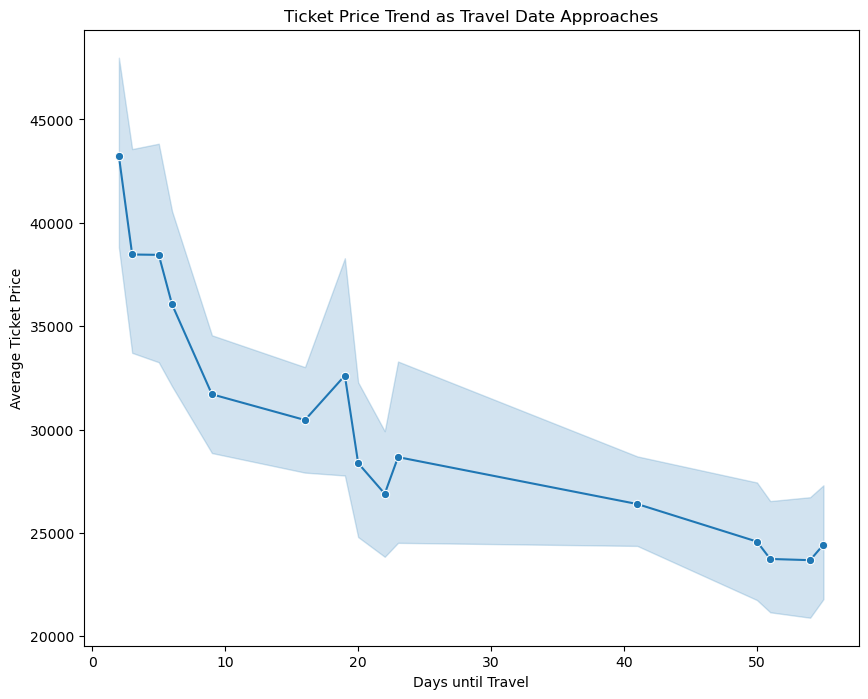

In [36]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x='days_until_travel', y='price', marker='o')
plt.title('Ticket Price Trend as Travel Date Approaches')
plt.xlabel('Days until Travel')
plt.ylabel('Average Ticket Price')
plt.show()

## price vs Route

In [61]:
pivot_table = pd.pivot_table(data, values='price', index='route')
pivot_table

KeyError: 'route'

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='route', y='price')
plt.title('Ticket Price by Route', fontsize=16)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Ticket Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## price vs Cabin class

In [ ]:
pivot_table = pd.pivot_table(data, values='price', index='cabin_class')
pivot_table

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='cabin_class', y='price')
plt.title('Average Ticket Price by Cabin Class', fontsize=16)
plt.xlabel('Cabin Class', fontsize=12)
plt.ylabel('Average Ticket Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Price vs Stops

In [ ]:
pivot_table = pd.pivot_table(data, values='price', index='stops')
pivot_table

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stops', y='price', data=data)
plt.title('Ticket Price vs Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Ticket Price')
plt.show()

## Multivariate Analysis

## price vs cabin class and stops

In [ ]:
price_analysis = data.groupby(['stops', 'cabin_class'])['price'].mean().reset_index()
price_analysis

In [35]:
plt.figure(figsize=(12, 7))
sns.barplot(data=price_analysis, x='stops', y='price', hue='cabin_class')
plt.title('Average Ticket Price vs Number of Stops and Cabin Class', fontsize=16)
plt.xlabel('Number of Stops', fontsize=12)
plt.ylabel('Average Ticket Price', fontsize=12)
plt.legend(title='Cabin Class', fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'price_analysis' is not defined

<Figure size 1200x700 with 0 Axes>

## price vs stops and travel_type

In [38]:
travel_stop_data = data.groupby(['travel_type', 'stops'])['price'].mean().unstack()
travel_stop_data

stops,1 stop,2 stops,3 stops,Direct
travel_type,,,,
Holiday,35730.798698,30206.948182,37415.33,19122.322693
Weekday,41949.482284,30118.250000,NaN,18444.760959
Weekend,41773.636906,24745.345714,NaN,18535.253033


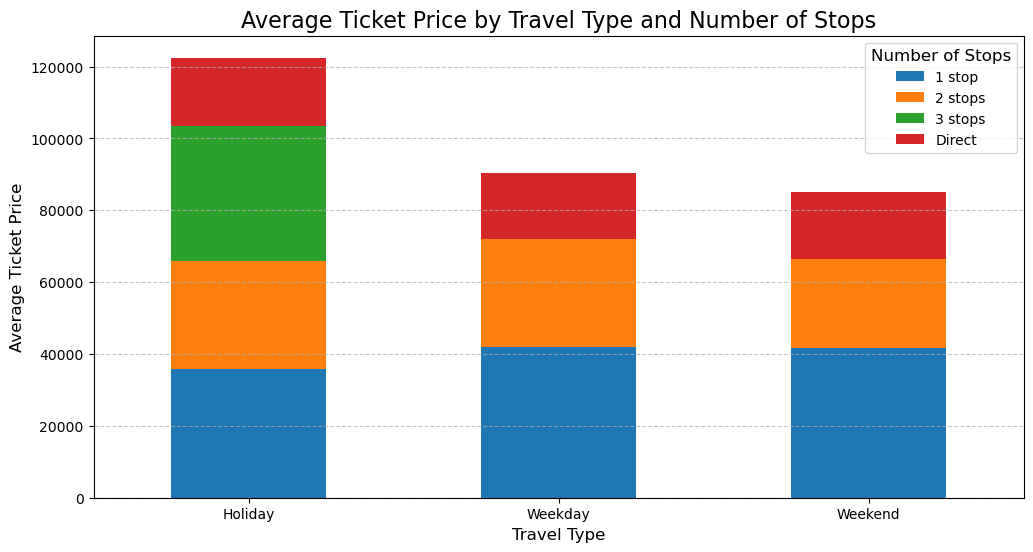

In [39]:
travel_stop_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Ticket Price by Travel Type and Number of Stops', fontsize=16)
plt.xlabel('Travel Type', fontsize=12)
plt.ylabel('Average Ticket Price', fontsize=12)
plt.legend(title='Number of Stops', fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## price vs route and booking_type

In [40]:
route_booking_pivot = data.pivot_table(
    values='price',
    index="route",
    columns='booking_type', 
    aggfunc='mean'
)
route_booking_pivot

KeyError: 'route'

In [42]:
plt.figure(figsize=(15, 8))
route_booking_pivot.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title('Average Ticket Price by Routes and Booking Type', fontsize=16)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Average Ticket Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Booking Type', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'route_booking_pivot' is not defined

<Figure size 1500x800 with 0 Axes>

## price vs cabin class and route

In [41]:
pivot_table = data.pivot_table(
    values='price', 
    index='route', 
    columns='cabin_class', 
    aggfunc='mean'
)
pivot_table

KeyError: 'route'

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Average Ticket Price by Route and Cabin Class', fontsize=16)
plt.xlabel('Cabin Class', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Ticket price vs booking_type and travel type

In [ ]:
pivot_table = data.pivot_table(
    values='price', 
    index='booking_type', 
    columns='travel_type', 
    aggfunc='mean'
)
pivot_table

In [ ]:
plt.figure(figsize=(15, 8))
pivot_table.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title('Average Ticket Price by Travel Type and Booking Type', fontsize=16)
plt.xlabel('Booking Type', fontsize=12)
plt.ylabel('Average Ticket Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Travel Type', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Correlation

In [ ]:
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
sns.pairplot(
    data=data,
    vars=['price', 'duration', 'days_until_travel'],
    hue='stops',  
    diag_kind='kde')
plt.show()